In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [52]:
#Import Data
rawWBdata = pd.read_csv('C:\\Users\\shyar\\OneDrive\\Bootcamp\\Project2\\Project-2\\train_update.csv')

rawWBdata.head(20)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [53]:
#Delete irrelevant column
rawWBdata = rawWBdata.drop("User_ID", axis = 1)

In [54]:
#Remove NA Records
rawWBdata = rawWBdata.dropna()

rawWBdata

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
3,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
5,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
7,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
9,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...
1995,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
1997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
1999,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
2001,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


In [55]:
#Check Data Types
rawWBdata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 2003
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   object 
 1   Gender                      1000 non-null   object 
 2   Platform                    1000 non-null   object 
 3   Daily_Usage_Time (minutes)  1000 non-null   float64
 4   Posts_Per_Day               1000 non-null   float64
 5   Likes_Received_Per_Day      1000 non-null   float64
 6   Comments_Received_Per_Day   1000 non-null   float64
 7   Messages_Sent_Per_Day       1000 non-null   float64
 8   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(4)
memory usage: 78.1+ KB


In [56]:
#Change numeric columns to int
rawWBdata["Age"] = rawWBdata["Age"].astype(int)

In [57]:
rawWBdata.to_csv('CleanWellbeingData.csv',index=False)

In [58]:
#Create X and y
X = rawWBdata.drop(columns='Dominant_Emotion')
y = rawWBdata["Dominant_Emotion"].values.reshape(-1,1)

In [59]:
#View y
y


array([['Happiness'],
       ['Anger'],
       ['Neutral'],
       ['Anxiety'],
       ['Boredom'],
       ['Happiness'],
       ['Anger'],
       ['Sadness'],
       ['Neutral'],
       ['Happiness'],
       ['Anxiety'],
       ['Sadness'],
       ['Boredom'],
       ['Happiness'],
       ['Anger'],
       ['Neutral'],
       ['Anxiety'],
       ['Sadness'],
       ['Neutral'],
       ['Happiness'],
       ['Anxiety'],
       ['Anger'],
       ['Boredom'],
       ['Happiness'],
       ['Sadness'],
       ['Neutral'],
       ['Anxiety'],
       ['Happiness'],
       ['Anger'],
       ['Sadness'],
       ['Boredom'],
       ['Happiness'],
       ['Neutral'],
       ['Sadness'],
       ['Anxiety'],
       ['Boredom'],
       ['Happiness'],
       ['Anger'],
       ['Neutral'],
       ['Anxiety'],
       ['Sadness'],
       ['Happiness'],
       ['Anger'],
       ['Neutral'],
       ['Boredom'],
       ['Happiness'],
       ['Sadness'],
       ['Anxiety'],
       ['Neutral'],
       ['Bor

In [60]:
#Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
X_train.describe()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,27.500000,96.446667,3.321333,40.373333,15.790667,22.721333
std,3.901918,39.665749,1.940902,26.790326,8.983008,8.623156
min,21.000000,40.000000,1.000000,6.000000,2.000000,8.000000
25%,24.000000,65.000000,2.000000,20.000000,8.000000,18.000000
50%,27.000000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.750000,120.000000,4.750000,55.000000,22.000000,28.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


In [61]:
#View Data
X_test

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
1895,30,Male,Instagram,175.0,7.0,100.0,33.0,38.0
905,29,Non-binary,Facebook,85.0,2.0,27.0,9.0,20.0
609,33,Male,LinkedIn,45.0,1.0,10.0,5.0,12.0
867,21,Female,Instagram,130.0,6.0,95.0,22.0,28.0
1733,25,Male,Twitter,90.0,6.0,42.0,14.0,26.0
...,...,...,...,...,...,...,...,...
2003,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0
383,32,Female,Whatsapp,105.0,4.0,55.0,25.0,25.0
1817,27,Female,Twitter,85.0,3.0,40.0,18.0,20.0
1017,29,Female,LinkedIn,55.0,2.0,15.0,5.0,10.0


In [62]:
#Check the data values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 231 to 677
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         750 non-null    int32  
 1   Gender                      750 non-null    object 
 2   Platform                    750 non-null    object 
 3   Daily_Usage_Time (minutes)  750 non-null    float64
 4   Posts_Per_Day               750 non-null    float64
 5   Likes_Received_Per_Day      750 non-null    float64
 6   Comments_Received_Per_Day   750 non-null    float64
 7   Messages_Sent_Per_Day       750 non-null    float64
dtypes: float64(5), int32(1), object(2)
memory usage: 49.8+ KB


In [64]:
#Encode nonnumeric data
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')  # drop='first' to avoid dummy variable trap

# Fit the encoder on the training data and transform it
X_train_encoded = encoder.fit_transform(X_train)

# Transform the testing data using the same encoder
X_test_encoded = encoder.transform(X_test)




c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [65]:
#Scale Data
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train_encoded)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train_encoded)
X_test_scaled = X_scaler.transform(X_test_encoded)


In [67]:
# Make and save testing predictions with the saved logistic regression model using the test data
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train_encoded, y_train)

testing_predictions = logistic_regression_model.predict(X_test_encoded)

# Review the predictions
testing_predictions

c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Happiness', 'Neutral', 'Boredom', 'Sadness', 'Sadness', 'Anger',
       'Sadness', 'Happiness', 'Happiness', 'Sadness', 'Anger', 'Boredom',
       'Sadness', 'Anger', 'Anxiety', 'Neutral', 'Neutral', 'Boredom',
       'Boredom', 'Boredom', 'Anger', 'Sadness', 'Anxiety', 'Boredom',
       'Neutral', 'Happiness', 'Happiness', 'Anxiety', 'Sadness',
       'Sadness', 'Anxiety', 'Neutral', 'Neutral', 'Sadness', 'Boredom',
       'Neutral', 'Anxiety', 'Happiness', 'Neutral', 'Anxiety',
       'Happiness', 'Anger', 'Happiness', 'Sadness', 'Neutral', 'Sadness',
       'Anger', 'Sadness', 'Happiness', 'Anxiety', 'Anger', 'Sadness',
       'Neutral', 'Anxiety', 'Neutral', 'Anxiety', 'Anger', 'Neutral',
       'Boredom', 'Anger', 'Neutral', 'Happiness', 'Happiness', 'Neutral',
       'Sadness', 'Sadness', 'Anxiety', 'Sadness', 'Neutral', 'Anger',
       'Anxiety', 'Neutral', 'Anxiety', 'Happiness', 'Happiness',
       'Boredom', 'Anger', 'Boredom', 'Anger', 'Boredom', 'Boredom',
       'B

In [68]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, testing_predictions)

0.976

In [69]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Make and save testing predictions with the saved logistic regression model using the test data
clf = RandomForestClassifier(random_state=42, n_estimators=75).fit(X_train_scaled, y_train)

predictions = clf.predict(X_test_scaled)

# Review the predictions

predictions


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array(['Happiness', 'Neutral', 'Boredom', 'Sadness', 'Sadness', 'Anger',
       'Sadness', 'Happiness', 'Happiness', 'Sadness', 'Anger', 'Boredom',
       'Sadness', 'Anger', 'Anxiety', 'Neutral', 'Neutral', 'Anxiety',
       'Boredom', 'Boredom', 'Anger', 'Sadness', 'Anxiety', 'Boredom',
       'Neutral', 'Happiness', 'Happiness', 'Anxiety', 'Sadness',
       'Sadness', 'Anxiety', 'Neutral', 'Neutral', 'Sadness', 'Boredom',
       'Neutral', 'Anxiety', 'Happiness', 'Neutral', 'Anxiety',
       'Happiness', 'Anger', 'Happiness', 'Sadness', 'Neutral', 'Sadness',
       'Anger', 'Sadness', 'Happiness', 'Anxiety', 'Anger', 'Sadness',
       'Neutral', 'Anxiety', 'Neutral', 'Anxiety', 'Anger', 'Neutral',
       'Boredom', 'Anger', 'Neutral', 'Happiness', 'Happiness', 'Neutral',
       'Sadness', 'Sadness', 'Anxiety', 'Sadness', 'Neutral', 'Anger',
       'Anxiety', 'Neutral', 'Anxiety', 'Happiness', 'Happiness',
       'Boredom', 'Anger', 'Boredom', 'Anger', 'Boredom', 'Boredom',
       'B

In [70]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, predictions)

0.976

In [71]:
# Get the feature importance array
importances = clf.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(clf.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.02144095046457891, 'Posts_Per_Day'),
 (0.017821003794739474, 'Comments_Received_Per_Day'),
 (0.015000069130283698, 'Age'),
 (0.014285526566429271, 'Likes_Received_Per_Day'),
 (0.013787979348607893, 'Gender'),
 (0.010144430087128242, 'Messages_Sent_Per_Day'),
 (0.009306168788007977, 'Platform'),
 (0.008135771854208506, 'Daily_Usage_Time (minutes)')]

In [73]:
#Create Decision Tree Model
model= tree.DecisionTreeClassifier()

model = model.fit(X_train_scaled, y_train)

#create predictions
tree_predictions = model.predict(X_test_scaled)

In [74]:
#Decision Tree Accuracy
acc_score = accuracy_score(y_test, tree_predictions)

print(f"Accuracy Score: {acc_score}")

Accuracy Score: 0.984


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 1.000/0.968
k: 3, Train/Test Score: 0.965/0.968


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 5, Train/Test Score: 0.965/0.968
k: 7, Train/Test Score: 0.961/0.944


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 9, Train/Test Score: 0.961/0.944
k: 11, Train/Test Score: 0.896/0.776


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 13, Train/Test Score: 0.868/0.728
k: 15, Train/Test Score: 0.767/0.604


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 17, Train/Test Score: 0.665/0.544
k: 19, Train/Test Score: 0.640/0.528


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


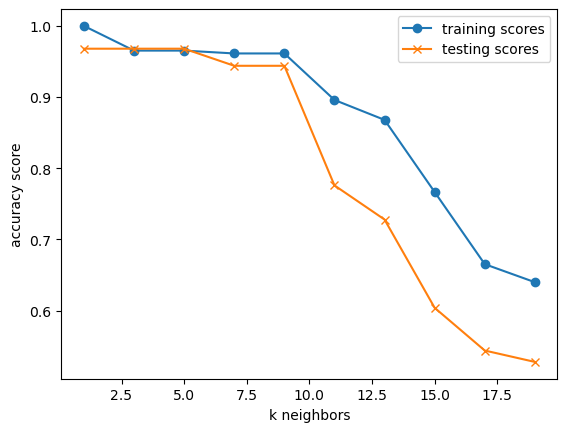

In [77]:
#KNN Model
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [94]:
# Choose the best k, and refit the KNN classifier by using that k value.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Print the score for the test data.
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.968


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [81]:

# Create a pipeline to scale data and train SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
#SVM Support Vector Machine

SVM Accuracy: 0.976


c:\Users\shyar\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
